# Create synthetic topography

In [1]:
import vedo
import numpy as np

In [2]:
vedo.settings.default_backend= 'vtk'

In [3]:
# Python package noise (https://github.com/caseman/noise) for generating Perlin noise.
# Such noise is usefull to simulate topography.
import noise

In [4]:
import matplotlib.pyplot as plt

In [6]:
from gravmag import data_structures

In [11]:
import pandas as pd

In [5]:
# number of prisms forming the model along the x and y directions
model_shape = (40, 50)

# minimum x, maximum x, minimum y and maximum y
model_area = [-5100, 4900, -3800, 6200]

In [7]:
model_dx, model_dy = data_structures.grid_xy_spacing(area=model_area, shape=model_shape)
print('model dx = {:.3f} m | model dx = {:.3f} m'.format(model_dx, model_dy))

model dx = 256.410 m | model dx = 204.082 m


In [9]:
# Generate a synthetic random surfaces with the Python package 
# [`noise`](https://pypi.org/project/noise/), by following the example 
# presented at [Jack McKew's Blog](https://jackmckew.dev/3d-terrain-in-python.html)

# parameters controlling the surface
amplitude = 500.
vertical_center = 250.

# generate the surface
thickness = np.zeros(model_shape)
for i in range(model_shape[0]):
    for j in range(model_shape[1]):
        thickness[i][j] = noise.pnoise2(
            i/40, 
            j/30, 
            octaves=29, 
            persistence=0.4,
            lacunarity=3, 
            repeatx=10, 
            repeaty=4, 
            base=0
        )
thickness = (
    amplitude*(
        (thickness - np.min(thickness))/(np.max(thickness) - np.min(thickness))
    )
)

# horizontal boundaries of the prisms
X, Y = data_structures.grid_xy_to_full_matrices_view(
    x = np.linspace(
        model_area[0] + 0.5*model_dx, 
        model_area[1] - 0.5*model_dx, 
        model_shape[0]
    ),
    y = np.linspace(
        model_area[2] + 0.5*model_dy, 
        model_area[3] - 0.5*model_dy, 
        model_shape[1]
    ),
    shape = model_shape
)

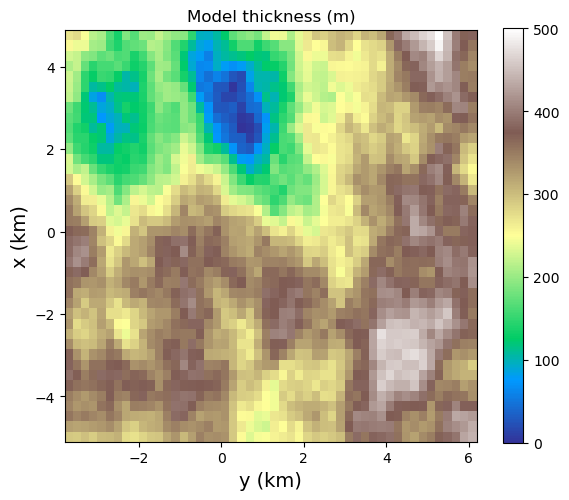

In [10]:
plt.figure(figsize=(6,5))

plt.title("Model thickness (m)")
plt.axis('scaled')
plt.pcolor(
    Y*0.001, X*0.001, thickness, cmap='terrain')
plt.colorbar()
#plf.model_boundaries(model)
plt.ylim(0.001*model_area[0], 0.001*model_area[1])
plt.xlim(0.001*model_area[2], 0.001*model_area[3])
plt.xlabel('y (km)', fontsize=14)
plt.ylabel('x (km)', fontsize=14)

plt.tight_layout()

plt.show()

In [18]:
test = np.arange(20).reshape((4,5))
print(test)

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]]


In [24]:
test.strides

(40, 8)

In [30]:
X.strides

(8, 0)

In [20]:
test[0,0] -=1

In [21]:
print(test)

[[-1  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]]


In [27]:
test_view = np.lib.stride_tricks.as_strided(
    test, (test.size, ), (test.strides[1],), writeable=False
)

In [28]:
test_view

array([-1,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [29]:
test_view[0] = -1

ValueError: assignment destination is read-only

In [17]:
# create a mesh object from the 2D Delaunay triangulation of the point clouds
surface = vedo.Points(np.dstack([X, Y, thickness])).generate_delaunay2d()

ValueError: input shape is not supported: (40, 50, 3)

In [ ]:
# https://vedo.embl.es/docs/vedo/addons.html#Axes
